In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast  # This library is used to parse the string representation of the dictionary
pd.options.mode.chained_assignment = None 

In [280]:
data_path = './data/'
folder_name = 'MovieSummaries/'
data_plot_sum = data_path + folder_name + 'plot_summaries.txt'
data_movie_name = data_path + folder_name + 'movie.metadata.tsv'
data_character_name = data_path + folder_name + 'character.metadata.tsv'
data_tvtropes = data_path + folder_name+ 'tvtropes.clusters.txt'
data_namecluster = data_path + folder_name+ 'name.clusters.txt'
data_ethnicity =  data_path + 'EthnicitiesLabels.csv'

In [281]:
col_name_movie = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", 
                  "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", 
                  "Movie genres (Freebase ID:name tuples)"]
col_name_charcter = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth",
                      "Actor gender", "Actor height (in meters)","Actor ethnicity (Freebase ID)","Actor name","Actor age at movie release",
                      "Freebase character/actor map ID","Freebase character ID","Freebase actor ID"]

In [282]:
df_plot = pd.read_csv(data_plot_sum,sep='\t', header=None, names=["movie ID","Summary"])
df_movie = pd.read_table(data_movie_name,sep='\t', header=None, names = col_name_movie)
df_character = pd.read_table(data_character_name,sep='\t', header=None, names = col_name_charcter)
df_tvtropes = pd.read_csv(data_tvtropes, sep='\t', header=None, names=["character type","match"])
df_name = pd.read_csv(data_namecluster, sep='\t', header=None, names=["character name", "movie ID"])
df_label_ethnicity = pd.read_csv(data_ethnicity, sep=',', header=None, names=['Actor ethnicity (Freebase ID)','Actor Ethnicity'])

In [283]:
df_plot.head(1)

,movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."


In [284]:
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


In [285]:
df_character.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7


In [286]:
df_name.head(1)

,character name,movie ID
0,Stuart Little,/m/0k3w9c


## Preprocessing of the dataframe for the part 1-2-3

In [287]:
df_movie_charac = pd.merge(df_character, df_movie, on=['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date'], how='inner')
df_movie_charac.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie name,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


### Some Plots to check some basics informations

Text(0.5, 1.0, 'Number of actors per movie')

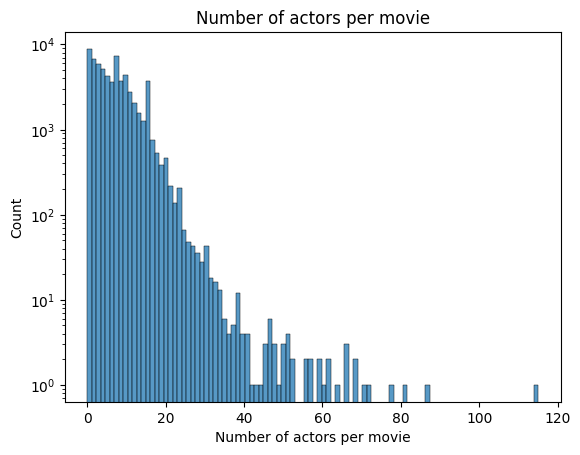

In [288]:
sns.histplot(df_movie_charac.groupby("Wikipedia movie ID")['Actor name'].count(), bins=100, log=True)
plt.xlabel('Number of actors per movie')
plt.title('Number of actors per movie')

Text(0.5, 1.0, 'Number of movies per year')

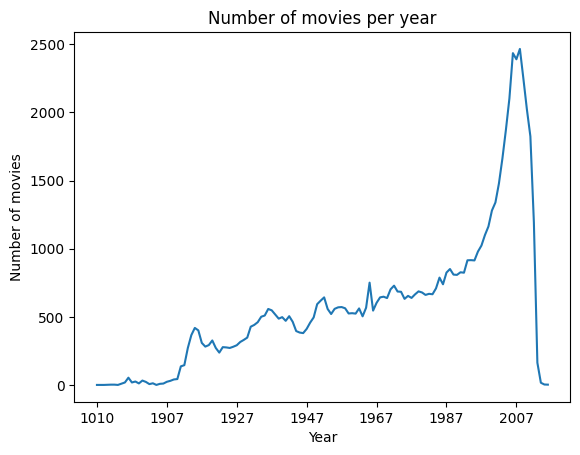

In [289]:
#drop Nan values
df_movie_filter = df_movie.dropna(subset=['Movie release date']).copy()
#filter out only the release year
df_movie_filter['Movie release year'] = df_movie_filter['Movie release date'].str[:4]
#plot the number of movies per year
df_movie_filter.groupby('Movie release year').count()['Movie name'].plot()
plt.ylabel('Number of movies')
plt.xlabel('Year')
plt.title('Number of movies per year')

## Preprocessing of the data for the Part 1 & 2

In [290]:
df_plot.rename(columns={'movie ID':'Wikipedia movie ID'}, inplace=True)
df_movie_charac_plot = pd.merge(df_plot, df_movie_charac, on=['Wikipedia movie ID'], how='inner')
df_movie_charac_plot.drop(columns=['Movie release date', 'Actor date of birth', 'Actor height (in meters)', 'Movie box office revenue', 
                                   'Movie runtime', 'Movie languages (Freebase ID:name tuples)', 'Movie countries (Freebase ID:name tuples)', 
                                   'Movie genres (Freebase ID:name tuples)'], inplace=True)
df_movie_charac_plot_filter = df_movie_charac_plot.dropna(subset=['Character name','Summary'] )
df_movie_charac_plot_filter.head(1)

,Wikipedia movie ID,Summary,Freebase movie ID,Character name,Actor gender,Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie name
6,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,Foxface,NaN,NaN,Jacqueline Emerson,NaN,/m/0gwc39w,/m/0gwc39z,/m/0gwc3b5,The Hunger Games


In [291]:
def compute_apparition_frequency(character_name, text):
    """
    Compute the maximum count of the character's name in the related plot summary.
    Parameters:
    - character_name: the name of the character
    - text: the plot summary related to the character
    Return:
    -The apparition frequency of the character's name in the plot summary
    """

    # List of common prepositions to exclude from counting if some are countains in the character's name
    prepo_list = ['the', 'at', 'in', 'on', 'of', 'for', 'to', 'with', 'from', 'by', 'about', 'as', 'into', 'like', 'through', 'after', 'over', 
                  'between', 'out', 'against', 'during', 'without', 'before', 'under', 'around', 'among']
    
    # Split the character name into a list of words
    splited_name = character_name.split()
    
    # Initialize the maximum count of the character's name in the text
    max_count = 0
    
    # Iterate through each part of the character's name
    for name in splited_name:
        # Check if the count of the name in the text is greater than the current maximum count and if the name is not a preposition
        if text.count(name) > max_count and name not in prepo_list:
            max_count = text.count(name)
    
    # Return the maximum count of the character's name in the text
    return max_count

## Separating tvtropes

In [292]:
def convert_to_dict(string_repr):
    """
    Convert a string representation of a dictionary to an actual dictionary using ast.literal_eval.
    Parameters:
    - string_repr (str): The string representation of the dictionary.
    Returns:
    - dict or None: The converted dictionary if successful, otherwise None.
    """
    try:
        # Attempt to evaluate the string representation as a dictionary
        return ast.literal_eval(string_repr)
    except (ValueError, SyntaxError):
        # Return None if the conversion is not successful
        return None

# Apply the 'convert_to_dict' function to the 'match' column and create a new 'match_dict' column
df_tvtropes['match_dict'] = df_tvtropes['match'].apply(convert_to_dict)

# Concatenate the original DataFrame with the normalized values from the 'match_dict' column
df_tvtropes_clean = pd.concat([df_tvtropes, pd.json_normalize(df_tvtropes['match_dict'])], axis=1)

# Drop the 'match' and 'match_dict' columns as they are no longer needed
df_tvtropes_clean.drop(['match', 'match_dict'], axis=1, inplace=True)

# Rename columns for clarity with the others DataFrames
df_tvtropes_clean.rename(columns={'char': 'Character name', 'movie': 'Movie name', 'id': 'Freebase character/actor map ID', 
                                  'actor': 'Actor name'}, inplace=True)

#check how many nan values left in the dataframe
print(df_tvtropes_clean.isnull().sum().sum(), 'NaN values left in the dataframe')

# Display the first few rows of the cleaned DataFrame
df_tvtropes_clean.head()

0 NaN values left in the dataframe


,character type,Character name,Movie name,Freebase character/actor map ID,Actor name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


### Creating the dataframe for our analysis on the roles' sterotype and the importance of these roles

In [293]:
#creating the final dataframe for the first and second part of the project
df_part12 = pd.merge(df_tvtropes_clean, df_movie_charac_plot_filter, how='inner')
#merging with the ethnicity label
df_part12 = pd.merge(df_part12,df_label_ethnicity,how='inner')
df_part12.drop(columns=['Freebase character/actor map ID','Actor name','Wikipedia movie ID','Freebase movie ID','Freebase character ID', 
                        'Freebase actor ID','Actor ethnicity (Freebase ID)'],inplace=True)
df_part12_filter = df_part12.dropna(subset=['Actor Ethnicity','Actor gender', 'Actor age at movie release'])

Text(0.5, 1.0, "Exemple with Pirates of the Caribbean: Dead Man's Chest")

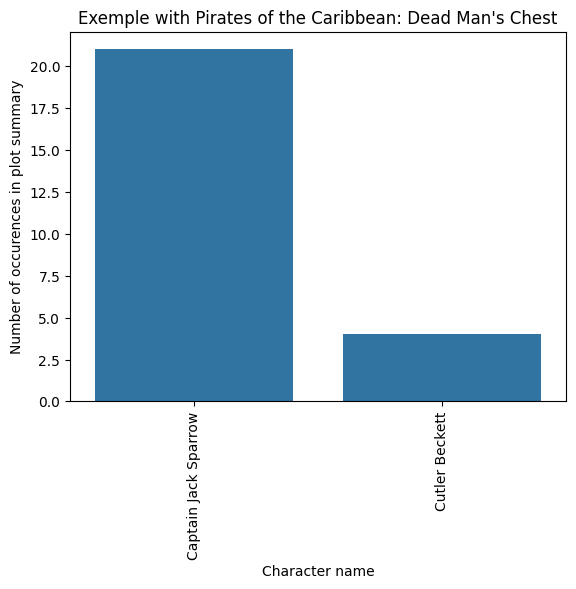

In [294]:
#example using df_part12 with Pirate of the Caribbean
pirate = df_part12_filter.loc[df_part12['Movie name'] == "Pirates of the Caribbean: Dead Man's Chest"]
#compute the frequency of apparition of each character in Pirate of the Caribbean in the plot summary
pirate.loc[:,'frequency_apparition'] = pirate.apply(lambda row: compute_apparition_frequency(row['Character name'], row['Summary']), axis=1)

sns.barplot(x=pirate['Character name'], y=pirate['frequency_apparition'])
plt.xticks(rotation=90)
plt.ylabel('Number of occurences in plot summary')
plt.title("Exemple with Pirates of the Caribbean: Dead Man's Chest")

Text(0.5, 1.0, 'Disparity of Male Female in the dataset')

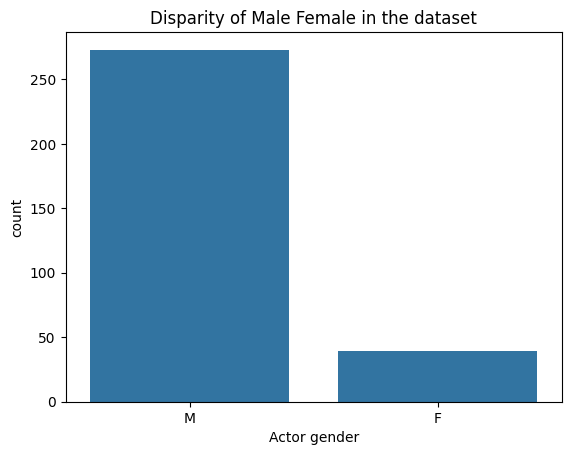

In [295]:
sns.barplot(df_part12_filter['Actor gender'].value_counts())
plt.title('Disparity of Male Female in the dataset')

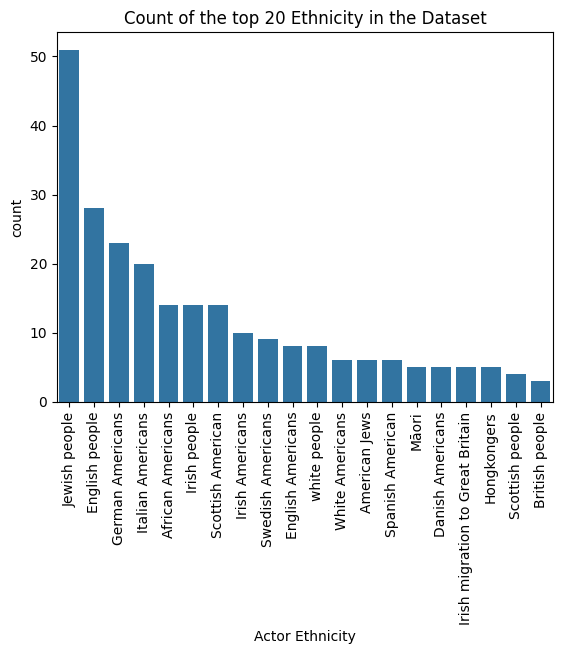

In [296]:
ethnicity_count = df_part12_filter['Actor Ethnicity'].value_counts()
sns.barplot(ethnicity_count[:20])
plt.title('Count of the top 20 Ethnicity in the Dataset')
plt.xticks(rotation=90)
plt.show()



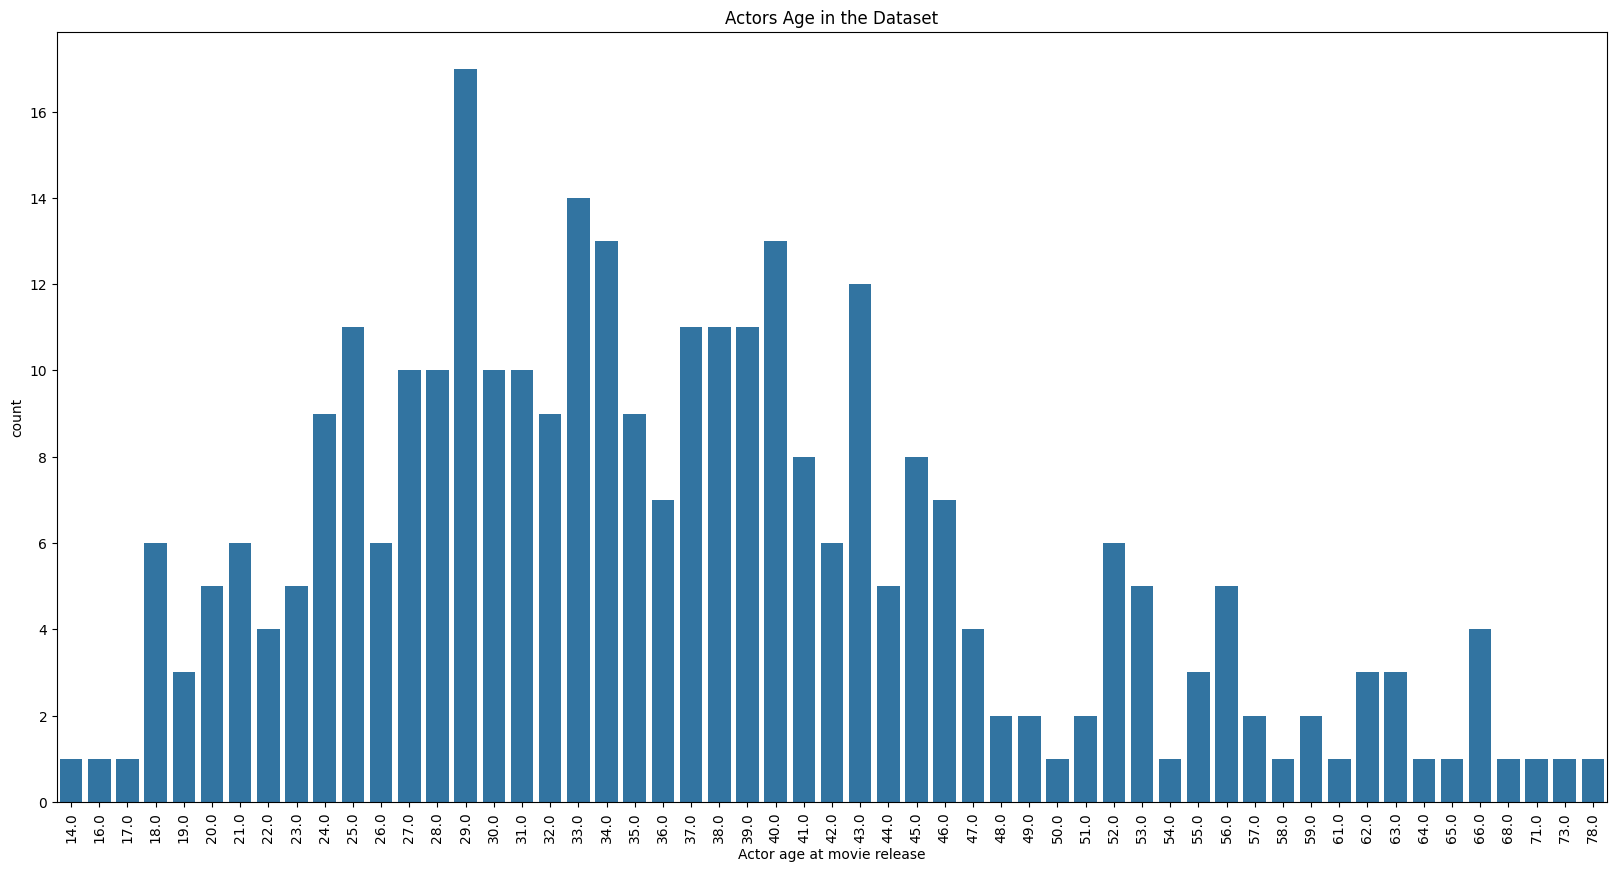

In [297]:
plt.figure(figsize=(20,10))
sns.barplot(df_part12_filter['Actor age at movie release'].value_counts())
plt.title('Actors Age in the Dataset')
plt.xticks(rotation=90)
plt.show()

In [298]:
#save the dataframe
df_part12_filter.to_csv('./data/part12.csv', index=False)

### Prepocessing of the dataframe for the 3rd part of the project

In [299]:
#merging with the label ethnicity
df_movie_charac = pd.merge(df_movie_charac,df_label_ethnicity,how='inner')
#drop the useless columns
df_movie_charac_filter = df_movie_charac.drop(columns=['Wikipedia movie ID', 'Freebase movie ID','Movie runtime',
                                                       'Movie languages (Freebase ID:name tuples)','Movie countries (Freebase ID:name tuples)',
                                                       'Movie genres (Freebase ID:name tuples)', 'Character name','Actor date of birth', 
                                                       'Actor height (in meters)','Actor ethnicity (Freebase ID)','Freebase character/actor map ID',
                                                       'Freebase character ID', 'Freebase actor ID'])
df_movie_chara_clean = df_movie_charac_filter.dropna(subset=['Movie name','Movie release date','Movie box office revenue','Actor gender',
                                                             'Actor Ethnicity','Actor name','Actor age at movie release'])
df_movie_chara_clean = df_movie_chara_clean.loc[df_movie_chara_clean['Actor age at movie release'] > 0]
df_movie_chara_clean.head(1)

,Movie release date,Actor gender,Actor name,Actor age at movie release,Movie name,Movie box office revenue,Actor Ethnicity
0,2001-08-24,M,Ice Cube,32.0,Ghosts of Mars,14010832.0,African Americans


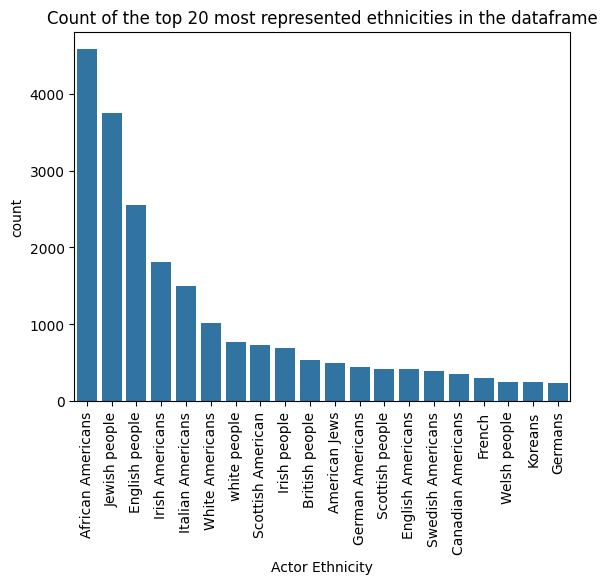

In [300]:
value_counts = df_movie_chara_clean['Actor Ethnicity'].value_counts()
sns.barplot(value_counts[:20])
plt.title('Count of the top 20 most represented ethnicities in the dataframe')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribution of the movie box office revenue')

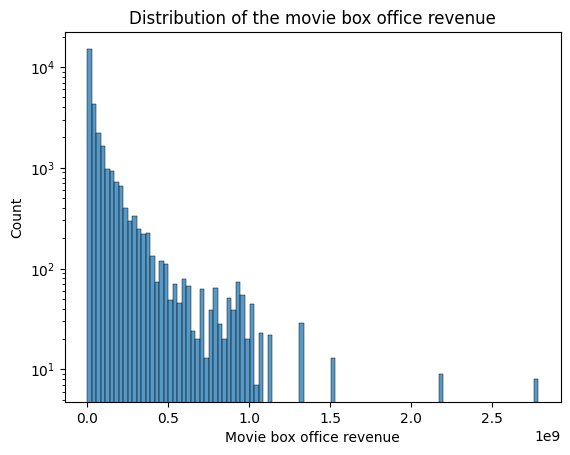

In [301]:
sns.histplot(df_movie_chara_clean['Movie box office revenue'],log=True, bins=100)
plt.title('Distribution of the movie box office revenue')

Text(0.5, 1.0, 'Male and Female Acotors cout in the dataframe')

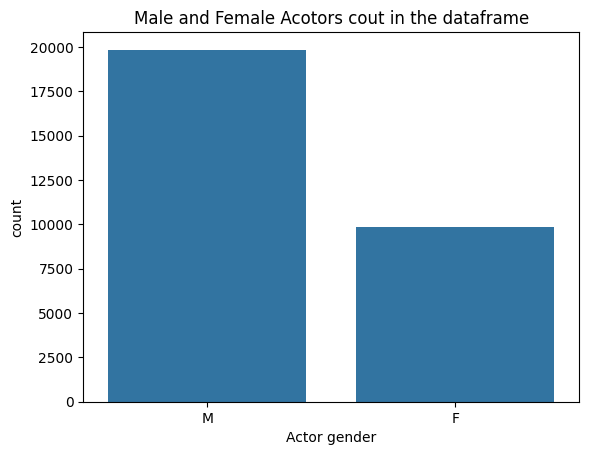

In [302]:
sns.barplot(df_movie_chara_clean['Actor gender'].value_counts())
plt.title('Male and Female Acotors cout in the dataframe')

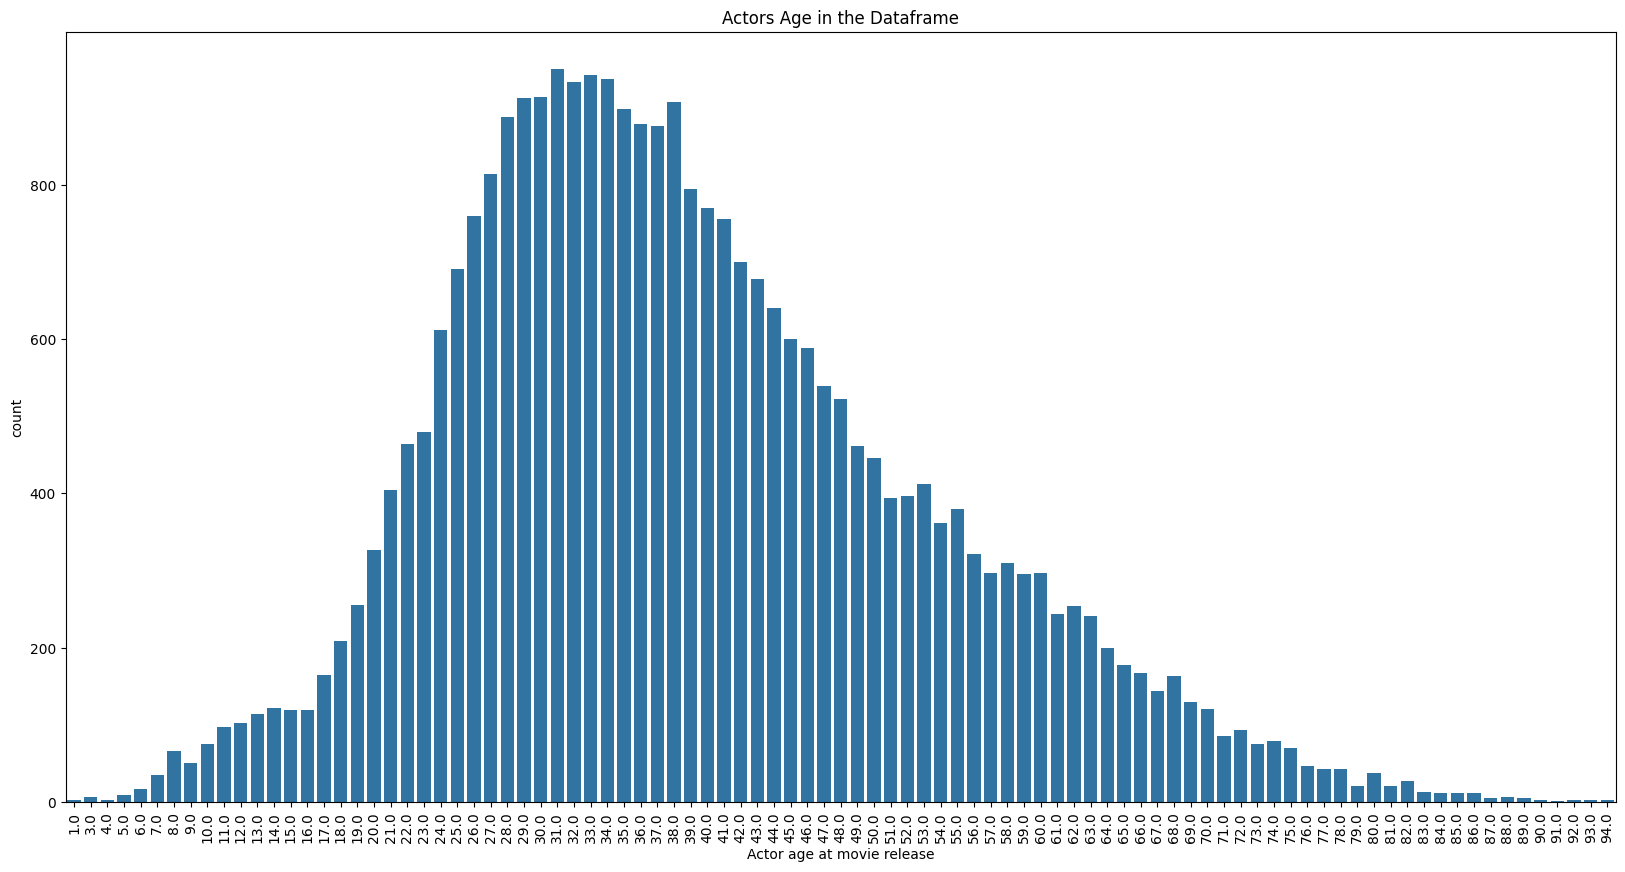

In [303]:
plt.figure(figsize=(20,10))
sns.barplot(df_movie_chara_clean['Actor age at movie release'].value_counts())
plt.xticks(rotation=90)
plt.title('Actors Age in the Dataframe')
plt.show()

In [304]:
#save the dataframe
df_movie_chara_clean.to_csv('./data/part3.csv', index=False)